# 3.2 Problem Statement

Build a sentiment analysis model to analyze customer reviews and feedback for a hospitality company.
The model should be able to classify reviews as positive, negative, or neutral, and identify key topics or areas of concern.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
def reading_file(x):
    return pd.read_csv(x, encoding = 'unicode_escape')

In [3]:
 df = reading_file('tripadvisor_hotel_reviews.csv')

In [4]:
df.shape

(20491, 2)

In [5]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [54]:
df['Review'][0]

'nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,  '

In [6]:
df.tail()

,Review,Rating
20486,"best kept secret 3rd time staying charm, not 5...",5
20487,great location price view hotel great quick pl...,4
20488,"ok just looks nice modern outside, desk staff ...",2
20489,hotel theft ruined vacation hotel opened sept ...,1
20490,"people talking, ca n't believe excellent ratin...",2


In [7]:
df.isna().sum()

Review    0
Rating    0
dtype: int64

In [8]:
def analysing_data_attributes(x):
    return x.isna().sum().plot(kind = 'bar')

<Axes: >

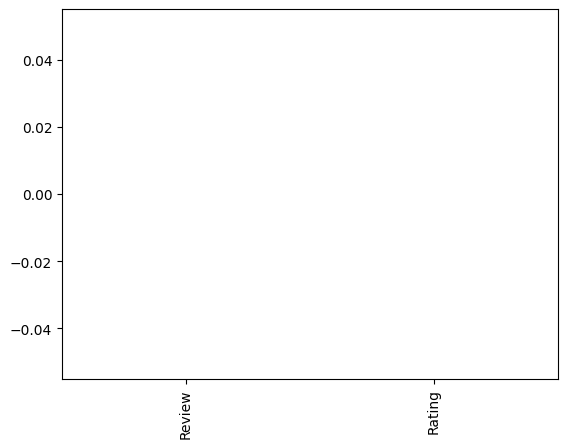

In [9]:
analysing_data_attributes(df)

In [10]:
df['Review'].value_counts()

nice hotel expensive parking got good deal stay hotel anniversary, arrived late evening took advice previous reviews did valet parking, check quick easy, little disappointed non-existent view room room clean nice size, bed comfortable woke stiff neck high pillows, not soundproof like heard music room night morning loud bangs doors opening closing hear people talking hallway, maybe just noisy neighbors, aveda bath products nice, did not goldfish stay nice touch taken advantage staying longer, location great walking distance shopping, overall nice experience having pay 40 parking night,                                                                                                                                                                                                                                                                                                                                                                                                                         

<Axes: >

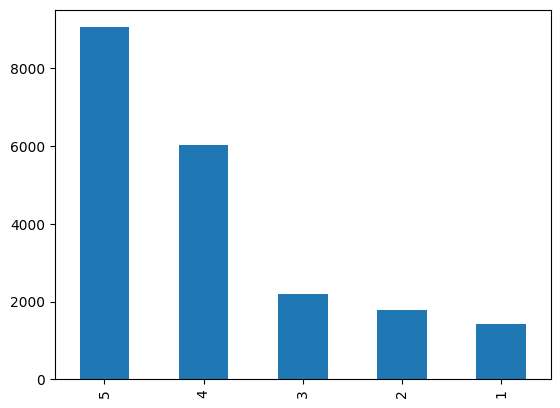

In [11]:
df['Rating'].value_counts().plot(kind = 'bar')

logic building

* if the value below 3 , cosider the review to be negative. i.e 0
* if the value above 3 or equal to 3, consider the review to be poitive. 1

In [12]:
for i in df['Rating']:
    if i >=3:
        print('postive')
    else:
        print('negative')

postive
negative
postive
postive
postive
postive
postive
postive
postive
postive
negative
postive
postive
postive
postive
negative
negative
postive
postive
postive
postive
postive
postive
postive
negative
postive
postive
postive
postive
postive
postive
postive
negative
negative
postive
postive
postive
postive
postive
postive
negative
postive
negative
postive
negative
negative
postive
postive
postive
postive
postive
postive
postive
postive
postive
postive
postive
postive
postive
postive
postive
postive
postive
postive
postive
negative
postive
postive
postive
negative
postive
negative
postive
postive
postive
postive
negative
negative
postive
negative
negative
postive
postive
negative
postive
postive
postive
postive
negative
postive
postive
postive
negative
postive
postive
postive
postive
negative
postive
negative
postive
negative
postive
postive
postive
postive
postive
postive
postive
postive
postive
postive
postive
postive
postive
postive
postive
postive
postive
postive
postive
postive


In [13]:
df['Feedback'] = df['Rating'].apply(lambda x: 1 if x >=3 else 0)

In [14]:
df.head()

,Review,Rating,Feedback
0,nice hotel expensive parking got good deal sta...,4,1
1,ok nothing special charge diamond member hilto...,2,0
2,nice rooms not 4* experience hotel monaco seat...,3,1
3,"unique, great stay, wonderful time hotel monac...",5,1
4,"great stay great stay, went seahawk game aweso...",5,1


In [15]:
df.duplicated().sum()

0

In [16]:
df.drop_duplicates(inplace = True)

In [17]:
df.shape

(20491, 3)

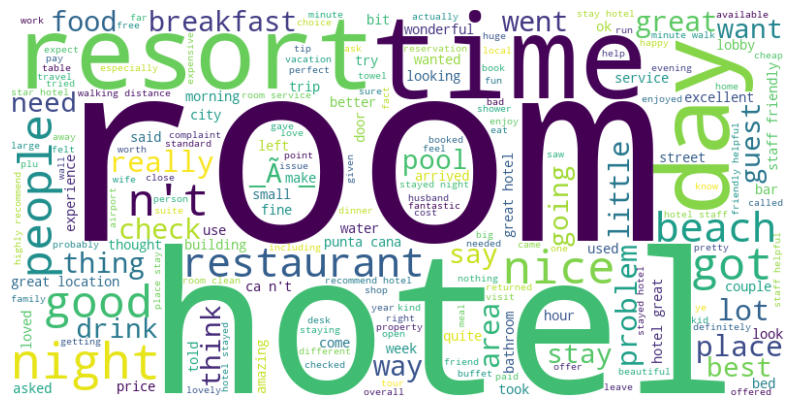

In [18]:
from wordcloud import WordCloud
df = df[df['Review'].notna()]
text = ' '.join(df['Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

through wordcloud i can able to analyse the frequency of occurance of words in the sentences.

In [19]:
len(df['Review'][0])

593

As the model cannot able to process the lengthy sentences. so doing chunking will helpful in analysing the context present in the sentences 

In [20]:
''''
def partitioning_data_into_chunks(row, window_size=512, overlapping=100):
    chunks = []
    i = 0
    while i < len(row['Review']):
        chunk_end = min(i + window_size, len(row['Review']))
        chunks.append(row['Review'][i:chunk_end])
        i += window_size - overlapping
    return chunks

df['Review'] = df.apply(partitioning_data_into_chunks, axis=1)

'''

"'\ndef partitioning_data_into_chunks(row, window_size=512, overlapping=100):\n    chunks = []\n    i = 0\n    while i < len(row['Review']):\n        chunk_end = min(i + window_size, len(row['Review']))\n        chunks.append(row['Review'][i:chunk_end])\n        i += window_size - overlapping\n    return chunks\n\ndf['Review'] = df.apply(partitioning_data_into_chunks, axis=1)\n\n"

In [21]:
df.head()

,Review,Rating,Feedback
0,nice hotel expensive parking got good deal sta...,4,1
1,ok nothing special charge diamond member hilto...,2,0
2,nice rooms not 4* experience hotel monaco seat...,3,1
3,"unique, great stay, wonderful time hotel monac...",5,1
4,"great stay great stay, went seahawk game aweso...",5,1


In [22]:
#new_df = df.explode(column = 'Review', ignore_index = True)

In [23]:
df.head()

,Review,Rating,Feedback
0,nice hotel expensive parking got good deal sta...,4,1
1,ok nothing special charge diamond member hilto...,2,0
2,nice rooms not 4* experience hotel monaco seat...,3,1
3,"unique, great stay, wonderful time hotel monac...",5,1
4,"great stay great stay, went seahawk game aweso...",5,1


In [24]:
df['Feedback'].value_counts()

1    17277
0     3214
Name: Feedback, dtype: int64

As the target feature consisting of biasnes as the distribution of data is imbalance so inorder to get the required output in balance need to use sampling techquie. because of the the predicted feature will show biases.

In [25]:
X = df.iloc[:, -3]

In [26]:
Y = df.iloc[:,-1]

In [27]:
Y.head()

0    1
1    0
2    1
3    1
4    1
Name: Feedback, dtype: int64

Inorder to reduce the data leakage i splited the data before hand. such the predictive output will show no biasesnes

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
from sklearn.model_selection import train_test_split

def spliting_the_data_into_train_test_split(x, y):
    assert len(x) == len(y)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, shuffle=True, stratify=y)
    
    return x_train, x_test, y_train, y_test

x_train, x_test, y_train, y_test = spliting_the_data_into_train_test_split(X, Y)

In [30]:
y_test.value_counts()

1    5184
0     964
Name: Feedback, dtype: int64

In [31]:
x_train.shape

(14343,)

In [32]:
x_test.shape

(6148,)

In [33]:
y_train.shape

(14343,)

In [34]:
y_test.shape

(6148,)

In [35]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
v=nltk.download("stopwords")
nltk.download("wordnet")
len(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\spran\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\spran\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


179

In [36]:
lemmatizer = WordNetLemmatizer()
english_stopwords = set(stopwords.words('english'))

Using lemmatization instead of stemming as it uses the parts of speech instead of removing the suffixs and the meaning of the word could actually captures in the lemmatisation as it uses the parts of speech

In [37]:
def preprocess(raw_text):
    sentence = re.sub("[^a-zA-Z]", " ", raw_text)
    
    sentence = sentence.lower()

    tokens = sentence.split()
                    
    clean_tokens = [t for t in tokens if t not in english_stopwords]
    
    clean_tokens = [lemmatizer.lemmatize(word) for word in clean_tokens]
    
    return " ".join(clean_tokens)

X_train = x_train.apply(preprocess)

In [38]:
#X_train.rename(columns={X_train.columns[0]: 'Customers_Feedback'}, inplace=True)

In [39]:
X_train.head()

8748     beautiful hotel beautiful hotel night sept big...
15257    disappointed booked hotel work retreat partly ...
11828    great hotel perfect location got night barcelo...
19753    favourite pick place stayed europe partner wee...
5615     fantastic hotet returned night stay hotel fant...
Name: Review, dtype: object

In [40]:
X_test = x_test.apply(preprocess)

In [41]:
#X_test.rename(columns={X_train.columns[0]: 'Customers_Feedback'}, inplace=True)

In [42]:
X_test.head()

10182    great location stayed night staff friendly sta...
13196    wonderful experience stayed argonaut business ...
15943    rated reading review royal plaza decided book ...
13250    excellent hotel location stayed night year old...
14785    lovely got staying night maestro stayed bedrm ...
Name: Review, dtype: object

In [43]:
#from sentence_transformers import SentenceTransformer

#model = SentenceTransformer("all-MiniLM-L6-v2")

In [44]:

#query_embedding = model.encode(X_train['Customers_Feedback'].values.tolist())

In [45]:
from sklearn.pipeline import Pipeline

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

pipelines = {
    'naive_bayes': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', MultinomialNB())
    ]),
    'decision_tree': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', DecisionTreeClassifier())
    ]),
    'logistic_regression': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', LogisticRegression())
    ]),
    'svc': Pipeline([
        ('vectorization', CountVectorizer()),
        ('classifier', SVC())
    ])
}

# Define parameter grid for each algorithm
param_grids = {
    'naive_bayes': [
        {
            'vectorization__max_features' : [1000, 1500, 2000, 5000], 
            'classifier__alpha' : [1, 10]
        }
    ],
    'decision_tree': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'vectorization__max_features' : [1000, 1500, 2000, 5000],
            'classifier__max_depth': [None, 5, 10]
        }
    ],
    
    'logistic_regression': [
    {
        'vectorization': [CountVectorizer(), TfidfVectorizer()],
        'vectorization__max_features' : [1000], 
        'classifier__C': [0.1, 1], 
        'classifier__penalty': ['elasticnet'], 
        'classifier__l1_ratio': [0.4],
        'classifier__solver': ['saga'],
        'classifier__class_weight': ['balanced'],
        'classifier__max_iter': [1000],
        'classifier__n_jobs': [-1]
    }
    ],
    'svc': [
        {
            'vectorization': [CountVectorizer(), TfidfVectorizer()],
            'classifier__kernel' : ['rbf'], 
            'classifier__C' : [0.1, 1, 10]
        }
    ]
}

best_models = {}

for algo in pipelines.keys():
    print("*"*10, algo, "*"*10)
    grid_search = GridSearchCV(estimator=pipelines[algo], 
                               param_grid=param_grids[algo], 
                               cv=5, 
                               scoring='f1', 
                               return_train_score=True,
                               verbose=1
                              )
    
    grid_search.fit(X_train, y_train)
    
    best_models[algo] = grid_search.best_estimator_
    
    print('Score on Test Data: ', grid_search.score(X_test, y_test))

********** naive_bayes **********
Fitting 5 folds for each of 8 candidates, totalling 40 fits
Score on Test Data:  0.9590913466166138
********** decision_tree **********
Fitting 5 folds for each of 24 candidates, totalling 120 fits
Score on Test Data:  0.9285648446861462
********** logistic_regression **********
Fitting 5 folds for each of 4 candidates, totalling 20 fits


C:\Users\spran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\spran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\spran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\spran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\spran\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

Score on Test Data:  0.9433549029367845
********** svc **********
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Score on Test Data:  0.9611374407582939


In [51]:
from joblib import dump, load
from sklearn import metrics
import joblib

In [53]:
import os
import joblib
from sklearn import metrics


os.makedirs('best_models', exist_ok=True)

# Assuming `best_models` is a dictionary with model names as keys and model objects as values
# e.g., best_models = {'model1': model1, 'model2': model2}

for name, model in best_models.items():
    print("*" * 10, name, "*" * 10)
    
    joblib.dump(model, f'best_models/{name}.pkl')
    
    loaded_model = joblib.load(f'best_models/{name}.pkl')
    
    %time y_test_pred = loaded_model.predict(X_test)
    f1 = metrics.f1_score(y_test, y_test_pred)
    print("Test Score (F1):", f1)

********** naive_bayes **********
CPU times: total: 344 ms
Wall time: 784 ms
Test Score (F1): 0.9590913466166138
********** decision_tree **********
CPU times: total: 359 ms
Wall time: 372 ms
Test Score (F1): 0.9285648446861462
********** logistic_regression **********
CPU times: total: 328 ms
Wall time: 381 ms
Test Score (F1): 0.9433549029367845
********** svc **********
CPU times: total: 22 s
Wall time: 22.8 s
Test Score (F1): 0.9611374407582939


In [59]:
from sentence_transformers import SentenceTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [60]:
model = SentenceTransformer("all-MiniLM-L6-v2")

In [61]:
feedback_list = X.values.tolist()

In [62]:
query_embedding = model.encode(feedback_list)

In [63]:
X_train_enc, X_test_enc, y_train, y_test = train_test_split(query_embedding, Y, test_size=0.2, random_state=42)

In [64]:
clf = RandomForestClassifier()
clf.fit(X_train_enc, y_train)

RandomForestClassifier()

In [65]:
y_pred = clf.predict(X_test_enc)

In [66]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.90
